# Setup
For the below problems, please use the \texttt{MNIST\_784} data set from OpenML.  Prior to using the data, scale the data and split into a test and training dataset.  Use the first 60,000 images as training data, and the remaining 10,000 images as test data.

In [79]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
import numpy as np

In [80]:
#fetch OpenML data
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

#split into test/training sets
N=60000
X_train, y_train = X[:N, :], y[:N]
X_test, y_test = X[N:, :], y[N:]

#scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Problem 1: Dimensionality Reduction
Using principal component analysis, reduce the dimensionality of the MNIST images to include 75% of the original variance.  How many components remain following the dimensionality reduction?

In [81]:
from sklearn.decomposition import PCA
pca_75= PCA(n_components=0.75,random_state=2020)
X_train= pca_75.fit_transform(X_train)
X_test = pca_75.transform(X_test)


In [82]:
rows=X.shape[0]
columns=X.shape[1]
print("Number of rows in Original mnist_784 Dataset is:",rows)
print("Number of Columns in Original mnist_784 Dataset is:",columns)


Number of rows in Original mnist_784 Dataset is: 70000
Number of Columns in Original mnist_784 Dataset is: 784


In [83]:
new_rows=pca_75.explained_variance_.shape[0]
print("Number of rows after dimensionality reduction of mnist_784 Dataset is:",new_rows)

Number of rows after dimensionality reduction of mnist_784 Dataset is: 120


Text(0, 0.5, 'Variance')

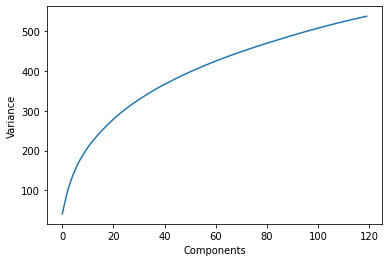

In [84]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca_75.explained_variance_))
plt.xlabel("Components")
plt.ylabel("Variance")

# Problem 2: Support Vector Machines

Use a support vector machine to classify whether a digit is less than 5 (i.e., $y \in \left\{0, 1, 2, 3, 4\right\}$).  Find a set of hyperparameters, to include the kernel function and $C$, that maximize the F1 score.

Notes:

* As in problem set 5, you may want to initially search $C$ over several orders of magnitude.  Consider initially searching with `np.logspace` to search over orders of magnitude.
* The hyperparameter selection may take a long time to run.  If using Google Colab, you may want to save or print the model so the work is not lost if the model reconnects.  See [Model persistence](https://scikit-learn.org/stable/modules/model_persistence.html) for details.
* Use a random search ([`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)) to test a broad set of different hyperparameter values.

In [85]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml

In [86]:
tdig = fetch_openml('mnist_784', version=1, as_frame=False)
X,y=tdig['data'],tdig['target']
X_train, X_test, y_train, y_test = X[:10000],X[10000:],y[:10000]<='5',y[10000:]<='5'

In [87]:
scaler = StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.transform(X_test)

## Using SVC with kernal='linear'

In [88]:
clf=SVC(C=1.0, kernel='linear', degree=3,coef0=0.0, shrinking=True, probability=False,tol=0.001, cache_size=200, class_weight=None, verbose=2, max_iter=10000, random_state=None)

In [89]:
import numpy as np

params = {'kernel': ['poly', 'rbf'],
    'C': np.logspace(-4,4,5),
    'gamma': np.logspace(-4,4, 5)
}

In [90]:
rand_clf = RandomizedSearchCV(estimator=clf, param_distributions=params,n_iter=5, verbose=3, cv=5, scoring='f1')
rand_clf.fit(X_train_Scaled, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[LibSVM][CV 1/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.750 total time=  51.0s
[LibSVM][CV 2/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.750 total time=  50.9s
[LibSVM][CV 3/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.750 total time=  51.3s
[LibSVM][CV 4/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.750 total time=  50.5s
[LibSVM][CV 5/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.749 total time=  50.7s
[LibSVM]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV 1/5] END ..C=1.0, gamma=10000.0, kernel=rbf;, score=0.750 total time=  56.3s
[LibSVM]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV 2/5] END ..C=1.0, gamma=10000.0, kernel=rbf;, score=0.750 total time=  59.3s
[LibSVM]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV 3/5] END ..C=1.0, gamma=10000.0, kernel=rbf;, score=0.750 total time=  58.2s
[LibSVM]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV 4/5] END ..C=1.0, gamma=10000.0, kernel=rbf;, score=0.750 total time=  56.4s
[LibSVM]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV 5/5] END ..C=1.0, gamma=10000.0, kernel=rbf;, score=0.749 total time=  56.4s
[LibSVM]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV 1/5] END C=10000.0, gamma=10000.0, kernel=rbf;, score=0.750 total time= 1.2min
[LibSVM]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV 2/5] END C=10000.0, gamma=10000.0, kernel=rbf;, score=0.750 total time= 1.3min
[LibSVM]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV 3/5] END C=10000.0, gamma=10000.0, kernel=rbf;, score=0.750 total time= 1.3min
[LibSVM]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV 4/5] END C=10000.0, gamma=10000.0, kernel=rbf;, score=0.750 total time= 1.3min
[LibSVM]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV 5/5] END C=10000.0, gamma=10000.0, kernel=rbf;, score=0.749 total time= 1.2min
[LibSVM]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV 1/5] END C=0.0001, gamma=100.0, kernel=poly;, score=0.972 total time=  15.2s
[LibSVM][CV 2/5] END C=0.0001, gamma=100.0, kernel=poly;, score=0.974 total time=  15.4s
[LibSVM][CV 3/5] END C=0.0001, gamma=100.0, kernel=poly;, score=0.970 total time=  14.9s
[LibSVM][CV 4/5] END C=0.0001, gamma=100.0, kernel=poly;, score=0.970 total time=  14.7s
[LibSVM]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV 5/5] END C=0.0001, gamma=100.0, kernel=poly;, score=0.957 total time=  14.6s
[LibSVM][CV 1/5] END ..C=0.0001, gamma=0.01, kernel=rbf;, score=0.750 total time=  49.0s
[LibSVM][CV 2/5] END ..C=0.0001, gamma=0.01, kernel=rbf;, score=0.750 total time=  49.5s
[LibSVM][CV 3/5] END ..C=0.0001, gamma=0.01, kernel=rbf;, score=0.750 total time=  50.7s
[LibSVM][CV 4/5] END ..C=0.0001, gamma=0.01, kernel=rbf;, score=0.750 total time=  49.6s
[LibSVM][CV 5/5] END ..C=0.0001, gamma=0.01, kernel=rbf;, score=0.749 total time=  49.9s
[LibSVM]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


RandomizedSearchCV(cv=5,
                   estimator=SVC(kernel='linear', max_iter=10000, verbose=2),
                   n_iter=5,
                   param_distributions={'C': array([1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04]),
                                        'gamma': array([1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04]),
                                        'kernel': ['poly', 'rbf']},
                   scoring='f1', verbose=3)

In [91]:
rand_clf.best_estimator_

SVC(C=0.0001, gamma=100.0, kernel='poly', max_iter=10000, verbose=2)

In [92]:
rand_clf.best_params_

{'C': 0.0001, 'gamma': 100.0, 'kernel': 'poly'}

In [93]:
rand_clf.best_score_

0.9686821438759964

## Using LinearSVC

In [94]:
lin_clf=LinearSVC()

In [95]:
parameters = {
    'C': np.logspace(-4,4,5),
    'penalty': ['l2'],
}

In [96]:
rand = RandomizedSearchCV(estimator=lin_clf, param_distributions=parameters,n_iter=5, verbose=3, cv=5, scoring='f1')
rand.fit(X_train_Scaled, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ..............C=0.0001, penalty=l2;, score=0.904 total time=   0.4s
[CV 2/5] END ..............C=0.0001, penalty=l2;, score=0.888 total time=   0.4s
[CV 3/5] END ..............C=0.0001, penalty=l2;, score=0.901 total time=   0.4s
[CV 4/5] END ..............C=0.0001, penalty=l2;, score=0.902 total time=   0.4s
[CV 5/5] END ..............C=0.0001, penalty=l2;, score=0.887 total time=   0.4s
[CV 1/5] END ................C=0.01, penalty=l2;, score=0.900 total time=   9.6s
[CV 2/5] END ................C=0.01, penalty=l2;, score=0.898 total time=   7.6s
[CV 3/5] END ................C=0.01, penalty=l2;, score=0.896 total time=   6.9s
[CV 4/5] END ................C=0.01, penalty=l2;, score=0.896 total time=   9.3s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END ................C=0.01, penalty=l2;, score=0.885 total time=   9.5s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5] END .................C=1.0, penalty=l2;, score=0.889 total time=  12.8s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END .................C=1.0, penalty=l2;, score=0.888 total time=  12.5s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5] END .................C=1.0, penalty=l2;, score=0.890 total time=  12.3s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5] END .................C=1.0, penalty=l2;, score=0.887 total time=  12.6s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END .................C=1.0, penalty=l2;, score=0.884 total time=  12.4s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5] END ...............C=100.0, penalty=l2;, score=0.864 total time=  13.4s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END ...............C=100.0, penalty=l2;, score=0.861 total time=  13.2s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5] END ...............C=100.0, penalty=l2;, score=0.849 total time=  13.0s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5] END ...............C=100.0, penalty=l2;, score=0.785 total time=  13.5s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END ...............C=100.0, penalty=l2;, score=0.840 total time=  13.4s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5] END .............C=10000.0, penalty=l2;, score=0.821 total time=  13.7s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END .............C=10000.0, penalty=l2;, score=0.866 total time=  13.2s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5] END .............C=10000.0, penalty=l2;, score=0.858 total time=  12.9s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5] END .............C=10000.0, penalty=l2;, score=0.858 total time=  13.3s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END .............C=10000.0, penalty=l2;, score=0.844 total time=  13.1s


RandomizedSearchCV(cv=5, estimator=LinearSVC(), n_iter=5,
                   param_distributions={'C': array([1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04]),
                                        'penalty': ['l2']},
                   scoring='f1', verbose=3)

In [97]:
rand.best_params_

{'C': 0.0001, 'penalty': 'l2'}

In [98]:
print("BestScore:",rand.best_score_)

BestScore: 0.8962653782259359


#Problem 3: Evaluation
Using the best estimator you found in the previous problem, show the confusion matrix for both the training and test data.

In [99]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [100]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(rand.best_estimator_, X_train_Scaled, y_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

       False       0.84      0.86      0.85      4006
        True       0.90      0.89      0.90      5994

    accuracy                           0.88     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.88      0.88      0.88     10000



In [127]:
import seaborn as sns
def show_classification_matrix(y_true, y_pred):
  cm = confusion_matrix(y_true, y_pred)
  fig= sns.heatmap(cm, 
              annot=True,
              fmt="0",
  )


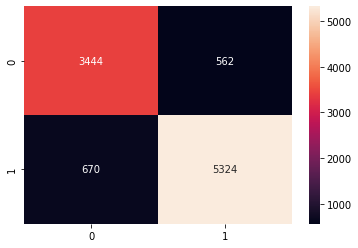

In [128]:
show_classification_matrix(y_train, y_pred)